In [702]:
import pandas as pd

In [703]:
rates = pd.read_csv('mortality_rate.csv')

In [704]:
rates.head()

,ISO Code,Country Name,Uncertainty bounds*,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AFG,Afghanistan,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.7,85.4,81.0,76.5,71.7,67.1,62.8,58.7,55.3,52.0
1,AFG,Afghanistan,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.9,93.9,90.0,86.2,82.6,79.2,76.0,73.1,70.4,67.9
2,AFG,Afghanistan,Upper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.8,103.0,99.6,96.5,93.6,91.0,88.7,86.6,85.3,84.5
3,ALB,Albania,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,11.9,11.3,10.7,10.2,9.7,9.3,9.0,8.6,8.3
4,ALB,Albania,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.8,12.8,12.0,11.3,10.7,10.1,9.7,9.4,9.1,8.8


In [705]:
names = rates['Country Name']
type(names)

pandas.core.series.Series

In [706]:
codes = rates['ISO Code']
# print(codes)

In [707]:
counter = 0
country_id = []
for code in codes:
    if counter < 1:
        counter += 1
        country_id.append(code)
    elif counter < 2:
        counter += 1
    else:
        counter = 0
# country_id

In [708]:
ids = pd.DataFrame(country_id)

In [709]:
ids.head()

,0
0,AFG
1,ALB
2,DZA
3,AND
4,AGO


In [710]:
import numpy as np

In [712]:
# refined_data = pd.DataFrame()
def mortality_year(year):
    year = str(year) + '.5'
    df = rates[year]
#     print(df)
    chosen_year=df.groupby(np.arange(len(df))//3).mean()
    year = pd.DataFrame(chosen_year)
    frames = [year, ids]
    refined_data = pd.concat([ids,year],axis=1)
    print(refined_data.head(1))
mortality_year(2012)

In [713]:
refined_data.head(1)

,0,2011.5
0,AFG,86.4


In [714]:
df = rates['2011']

In [715]:
year2011 = df.groupby(np.arange(len(df))//3).mean()

In [716]:
year = pd.DataFrame(year2011)

In [717]:
len(year)

202

In [718]:
ids = pd.DataFrame(country_id)

In [719]:
ids.head()

,0
0,AFG
1,ALB
2,DZA
3,AND
4,AGO


In [720]:
frames = [year, ids]

In [721]:
refined_data = pd.concat([ids,year],axis=1)
refined_data.head()

,0,2011
0,AFG,86.400000
1,ALB,11.300000
2,DZA,26.666667
3,AND,3.966667
4,AGO,116.966667


In [722]:
refined_data = refined_data.rename(columns={0:'ISO_Code','2011.5':'2011_Mortality_Rate'})
refined_data.head()

,ISO_Code,2011
0,AFG,86.400000
1,ALB,11.300000
2,DZA,26.666667
3,AND,3.966667
4,AGO,116.966667


In [723]:
refined_data.to_csv('testing_data.csv')

In [724]:
df = pd.read_csv('primary_school.csv')

In [725]:
data = df.loc[:,['2011','ISO-alpha3 code']]

In [726]:
# df[['1970', '1971']].replace({'..': np.NaN})

In [727]:
data = data.replace({'..':np.NaN})

In [728]:
data = data[data.columns[::-1]]
# Do not run again less the columns flip again ^ df.columns[::-1] reverses the order and df[] re-indexes the DataFrame

In [729]:
data = data.rename(columns={'ISO-alpha3 code':'ISO_Code'})

In [730]:
secondary_school = pd.read_csv('secondary_school.csv')

In [731]:
sec_sch_2011 = secondary_school.loc[:,['2011','ISO-alpha3 code']]

In [732]:
sec_sch_2011 = sec_sch_2011[sec_sch_2011.columns[::-1]]
sec_sch_2011.head()
# Do not run again less the columns flip again ^ df.columns[::-1] reverses the order and df[] re-indexes the DataFrame

,ISO-alpha3 code,2011
0,AFG,NaN
1,ALA,..
2,ALB,..
3,DZA,..
4,ASM,..


In [733]:
data = data.replace({'..':np.NaN})
sec_sch_2011 = sec_sch_2011.replace({'..':np.NaN})

In [734]:
data = data.rename(columns={'ISO-alpha3 code':'ISO_Code', '2011':'primary_school'})
sec_sch_2011 = sec_sch_2011.rename(columns={'ISO-alpha3 code':'ISO_Code', '2011': 'secondary_school'})
sec_sch_2011.head()
# data.head()

,ISO_Code,secondary_school
0,AFG,NaN
1,ALA,NaN
2,ALB,NaN
3,DZA,NaN
4,ASM,NaN


In [740]:
refined_data.head()

,ISO_Code,2011
0,AFG,86.400000
1,ALB,11.300000
2,DZA,26.666667
3,AND,3.966667
4,AGO,116.966667


In [735]:
# data & refined_data
final_table = pd.merge(data, refined_data, on='ISO_Code', how='inner')
final_table.head()

,ISO_Code,primary_school,2011
0,AFG,NaN,86.400000
1,ALB,12.96625,11.300000
2,DZA,NaN,26.666667
3,AND,NaN,3.966667
4,AGO,33.6125,116.966667


In [736]:
final_table = pd.merge(final_table, sec_sch_2011, on='ISO_Code', how='inner')
final_table.head()

,ISO_Code,primary_school,2011,secondary_school
0,AFG,NaN,86.400000,NaN
1,ALB,12.96625,11.300000,NaN
2,DZA,NaN,26.666667,NaN
3,AND,NaN,3.966667,NaN
4,AGO,33.6125,116.966667,NaN


In [737]:
final_table = final_table.dropna()
final_table.iloc[0:3]

,ISO_Code,primary_school,2011,secondary_school
7,ARM,4.23833,17.266667,3.37278
10,AZE,14.03457,35.433333,6.11723
15,BLR,9.0297,5.100000,3.41588


In [741]:
len(final_table)

47

In [742]:
gdp_csv = pd.read_csv('Global_GDP.csv')
gdp_csv.head(1)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.93927,23512.6026,24984.27945,24709.60226,25018.30895,25528.40378,25796.38025,25251.63968,25655.10202,NaN


In [743]:
gdp_data = gdp_csv[['2011','Country Code']]

In [744]:
gdp_data = gdp_data[gdp_data.columns[::-1]]
# Do not run again less the columns flip again ^ df.columns[::-1] reverses the order and df[] re-indexes the DataFrame

In [745]:
gdp_data = gdp_data.rename(columns={'Country Code': 'ISO_Code','2011':'GDP'})
gdp_data.head()

,ISO_Code,GDP
0,ABW,24984.279450
1,AFG,599.297630
2,AGO,4615.867475
3,ALB,4437.177794
4,AND,41098.766940


In [746]:
final_table = pd.merge(final_table, gdp_data, on='ISO_Code', how='inner')
final_table = final_table.dropna()
final_table.head()

,ISO_Code,primary_school,2011,secondary_school,GDP
0,ARM,4.23833,17.266667,3.37278,3526.978143
1,AZE,14.03457,35.433333,6.11723,7189.691229
2,BLR,9.0297,5.100000,3.41588,6519.230195
3,BEL,2.13122,4.400000,3.46296,47743.780530
4,BLZ,2.94798,18.433333,2.78339,4515.892701


In [747]:
final_table = final_table.iloc[:,0:5]
final_table = final_table.rename(columns={'GDP_x':'GDP'})
final_table.head(1)

,ISO_Code,primary_school,2011,secondary_school,GDP
0,ARM,4.23833,17.266667,3.37278,3526.978143


In [835]:
final_table = final_table.rename(columns={'2011':'2011_Mortality_Rate'})
final_table = final_table[['ISO_Code','primary_school','secondary_school','GDP','2011_Mortality_Rate']]
final_table.head()

,ISO_Code,primary_school,secondary_school,GDP,2011_Mortality_Rate
0,ARM,4.23833,3.37278,3526.978143,17.266667
1,AZE,14.03457,6.11723,7189.691229,35.433333
2,BLR,9.0297,3.41588,6519.230195,5.100000
3,BEL,2.13122,3.46296,47743.780530,4.400000
4,BLZ,2.94798,2.78339,4515.892701,18.433333


In [750]:
len(final_table)

47

In [752]:
final_table.to_csv('testing_data.csv')

Data Pre-Processing

In [753]:
sec_sch_2011 = secondary_school.loc[:,['2011','ISO-alpha3 code']]
X = final_table.loc[:, ['primary_school','secondary_school','GDP']]
y = final_table['2011_Mortality_Rate'].values.reshape(-1,1)
print(X.shape,y.shape)

(47, 3) (47, 1)


In [754]:
# LOOK UP (, random_state=#)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
# insert test_size=... and train_size=... 
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# X_test_scaled = X_scaler.transform(X_test)

# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.


In [240]:
# help(train_test_split)
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 |

In [755]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=3, kernel_initializer='random_uniform'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [756]:
model.compile(optimizer='adam',
             loss = 'mean_squared_error',
             metrics=['acc'])

model.fit(
    X_train_scaled, 
    y_train_scaled, 
    epochs=60, 
    shuffle=True, 
    verbose=2)

Epoch 1/60
 - 1s - loss: 1.0101 - acc: 0.0000e+00
Epoch 2/60
 - 0s - loss: 1.0021 - acc: 0.0000e+00
Epoch 3/60
 - 0s - loss: 0.9960 - acc: 0.0000e+00
Epoch 4/60
 - 0s - loss: 0.9909 - acc: 0.0000e+00
Epoch 5/60
 - 0s - loss: 0.9863 - acc: 0.0000e+00
Epoch 6/60
 - 0s - loss: 0.9820 - acc: 0.0000e+00
Epoch 7/60
 - 0s - loss: 0.9778 - acc: 0.0000e+00
Epoch 8/60
 - 0s - loss: 0.9736 - acc: 0.0000e+00
Epoch 9/60
 - 0s - loss: 0.9698 - acc: 0.0000e+00
Epoch 10/60
 - 0s - loss: 0.9655 - acc: 0.0000e+00
Epoch 11/60
 - 0s - loss: 0.9606 - acc: 0.0000e+00
Epoch 12/60
 - 0s - loss: 0.9566 - acc: 0.0000e+00
Epoch 13/60
 - 0s - loss: 0.9517 - acc: 0.0000e+00
Epoch 14/60
 - 0s - loss: 0.9471 - acc: 0.0000e+00
Epoch 15/60
 - 0s - loss: 0.9421 - acc: 0.0000e+00
Epoch 16/60
 - 0s - loss: 0.9370 - acc: 0.0000e+00
Epoch 17/60
 - 0s - loss: 0.9319 - acc: 0.0000e+00
Epoch 18/60
 - 0s - loss: 0.9265 - acc: 0.0000e+00
Epoch 19/60
 - 0s - loss: 0.9209 - acc: 0.0000e+00
Epoch 20/60
 - 0s - loss: 0.9150 - acc: 

In [757]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_14 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [758]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [759]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7418646456307642
Testing Score: 0.5302307721100319


In [760]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residual Plot')

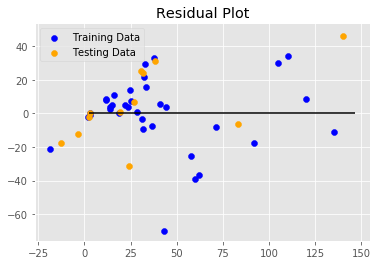

In [761]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [762]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [766]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  """
/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  


In [767]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 167.98192453749203, R2: -6200.457422930636


In [768]:
predictions

array([[12.78538085],
       [12.25903028],
       [12.74510121],
       [12.27245188],
       [12.0753712 ],
       [12.48664031],
       [11.79687542],
       [11.9539669 ],
       [11.96089847],
       [12.41194287],
       [11.7392932 ],
       [11.88524358]])

In [209]:
# from sklearn import tree
# import pandas as pd
# import os

In [251]:
# target = final_table['2011_Mortality_Rate']
# data = final_table[['primary_school','secondary_school']]
# feature_names = data.columns
# data.astype(int)

In [249]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [250]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [262]:
primary_school = pd.read_csv('primary_school.csv')
secondary_school = pd.read_csv('secondary_school.csv')
df_gdp = pd.read_csv('Global_GDP.csv')
mortalities = pd.read_csv('mortality_rate.csv')
# primary_school.head(1)
# secondary_school.head(1)
# df_gdp.head(1)
mortalities.head(1)

,ISO Code,Country Name,Uncertainty bounds*,1950.5,1951.5,1952.5,1953.5,1954.5,1955.5,1956.5,...,2008.5,2009.5,2010.5,2011.5,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5
0,AFG,Afghanistan,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.7,85.4,81.0,76.5,71.7,67.1,62.8,58.7,55.3,52.0


In [308]:
# mortalities.transpose() 

In [263]:
# mortalities.iloc[:,3:-1]

In [828]:
class country_year:
    def __init__(self, country_name, chosen_year):
        self.country = country_name
        self.year = chosen_year
        
    def mortality(self):
        testing = final_table.loc[final_table['ISO_Code'] == self.country]
#         df = rates[self.year]
#         df = rates.loc[rates["Country Name"] == self.country_name]
        return(testing)
#         chosen_year=df.groupby(np.arange(len(df))//3).mean()
#         year = pd.DataFrame(chosen_year)
#         frames = [year, ids]
#         refined_data = pd.concat([ids,year],axis=1)
#         refined_data = pd.DataFrame(refined_data)
#         return(refined_data.head())
        
        


In [832]:
user = country_year("ARM", "2011")

In [833]:
the_id = user.country
user.mortality()

,ISO_Code,primary_school,secondary_school,GDP,2011_Mortality_Rate
0,ARM,4.23833,3.37278,3526.978143,17.266667


In [831]:
final_table.loc[final_table['ISO_Code']=='IRE']

,ISO_Code,primary_school,secondary_school,GDP,2011_Mortality_Rate


In [822]:
rates.loc[rates['Country Name']=='Albania']

In [264]:
# refined_data = pd.DataFrame()
def mortality_year(year):
    year = str(year) + '.5'
    df = rates[year]
#     print(df)
    chosen_year=df.groupby(np.arange(len(df))//3).mean()
    year = pd.DataFrame(chosen_year)
    frames = [year, ids]
    refined_data = pd.concat([ids,year],axis=1)
    print(refined_data.head(1))
mortality_year(2012)

     0     2012.5
0  AFG  82.633333


In [265]:
refined_data.head(1)

,0,2011.5
0,AFG,86.4


Predictions Chart

In [655]:
primary_school = pd.read_csv('primary_school.csv')
secondary_school = pd.read_csv('secondary_school.csv')
df_gdp = pd.read_csv('Global_GDP.csv')
mortalities = pd.read_csv('mortality_rate.csv')
# primary_school.head(1)
# secondary_school.head(1)
# df_gdp.head(1)
# mortalities.head(1)

In [800]:
gdp_csv

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.939270,23512.602600,24984.279450,24709.602260,25018.308950,25528.403780,25796.380250,25251.639680,25655.102020,NaN
1,Afghanistan,AFG,GDP per capita (current US$),59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,...,444.184404,550.514974,599.297630,648.511070,647.966461,625.339539,590.076474,549.582760,550.068459,NaN
2,Angola,AGO,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3117.896944,3585.905553,4615.867475,5102.489969,5258.407376,5412.692348,4170.730358,3509.604211,4100.289786,NaN
3,Albania,ALB,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.360204,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4131.872341,4537.579056,NaN
4,Andorra,AND,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN
5,Arab World,ARB,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5159.342763,5918.315891,6856.035033,7465.135230,7510.729986,7456.598173,6429.170840,6183.079222,6235.420578,NaN
6,United Arab Emirates,ARE,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33072.575170,35037.892670,40434.366350,42086.689950,43315.141490,44443.061510,39122.049710,38517.800390,40698.849340,NaN
7,Argentina,ARG,GDP per capita (current US$),NaN,NaN,1148.579957,845.077184,1166.317400,1272.010496,1266.344989,...,8161.306966,10276.260500,12726.908360,12969.707120,12976.636420,12245.256450,13698.293440,12654.355000,14398.358770,NaN
8,Armenia,ARM,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2993.832531,3218.381655,3526.978143,3684.804810,3843.591213,3994.712355,3617.935746,3605.743117,3936.798320,NaN
9,American Samoa,ASM,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12058.263820,10352.822760,10375.994220,11660.329530,11589.853000,11598.751740,11901.975260,11744.815550,11394.475300,NaN


In [656]:
IRE_primary = primary_school.loc[primary_school['Country'] == 'Ireland']
IRE_secondary = secondary_school.loc[secondary_school['Country'] == 'Ireland']
IRE_gdp = df_gdp.loc[df_gdp['Country Name'] == 'Ireland']
IRE_mort = mortalities.loc[mortalities['Country Name'] == 'Ireland']
# IRE_primary
# IRE_secondary
# IRE_gdp
# IRE_mort

In [657]:
codes = IRE_mort['ISO Code']

In [658]:
counter = 0
country_id = []
for code in codes:
    if counter < 1:
        counter += 1
        country_id.append(code)
    elif counter < 2:
        counter += 1
    else:
        counter = 0
# country_id

In [659]:
country_id = pd.DataFrame(country_id)

In [660]:
IRE_mort = IRE_mort.groupby(np.arange(len(IRE_mort))//3).mean()
IRE_mort

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,54.266667,51.9,49.5,47.133333,44.866667,42.9,41.233333,39.8,38.333333,36.766667,...,4.433333,4.3,4.2,4.1,4.0,3.9,3.8,3.766667,3.666667,3.6


In [661]:
# new_frame = [country_id, IRE_mort] 
IRE_data = pd.concat([country_id, IRE_mort],axis=1)
IRE_data

,0,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,IRL,54.266667,51.9,49.5,47.133333,44.866667,42.9,41.233333,39.8,38.333333,...,4.433333,4.3,4.2,4.1,4.0,3.9,3.8,3.766667,3.666667,3.6


In [662]:
# IRE_primary
# IRE_secondary
# IRE_gdp

In [663]:
IRE_primary = IRE_primary.iloc[:,2:]
# Do not run again

In [664]:
IRE_primary

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,ISO-alpha3 code
103,..,4.59363,6.02848,5.79329,6.44096,5.61503,4.61964,3.90134,3.47226,4.42332,...,0.01064,2.68763,0.18328,0.53901,0.38299,..,0.04207,..,..,IRL


In [665]:
cols = list(IRE_primary.columns)
cols = [cols[-1]] + cols[:-1]
IRE_primary = IRE_primary[cols]

In [666]:
IRE_primary = IRE_primary.rename(columns={'ISO-alpha3 code':'ISO_Code'})

In [667]:
IRE_secondary

,Unnamed: 0,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,ISO-alpha3 code
103,103,Ireland,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,IRL


In [668]:
IRE_secondary = IRE_secondary.iloc[:,2:]
# Do not run again

In [669]:
cols = list(IRE_secondary.columns)
cols = [cols[-1]] + cols[:-1]
IRE_secondary = IRE_secondary[cols]

In [670]:
IRE_primary = IRE_primary.rename(columns={'ISO-alpha3 code':'ISO_Code'})

In [671]:
IRE_gdp = IRE_gdp.drop(['Country Name','Indicator Name'],axis=1)

In [672]:
IRE_gdp = IRE_gdp.rename(columns={'Country Code':'ISO_Code'})

In [673]:
IRE_primary = IRE_primary.iloc[:,1:]
# IRE_secondary = IRE_secondary.iloc[:,1:]
# IRE_gdp = IRE_gdp.iloc[:,1:]
# IRE_mort

In [681]:
IRE_primary = IRE_primary.transpose()
IRE_secondary = IRE_secondary.transpose()
IRE_gdp = IRE_gdp.transpose()
IRE_mort = IRE_mort.transpose()
# IRE_primary.head()
# IRE_secondary.head()
# IRE_gdp.head()
# IRE_mort.head()

In [682]:
IRE_primary = IRE_primary.rename(columns={103:'Primary_School'})
IRE_secondary = IRE_secondary.rename(columns={103:'Secondary_School'})
IRE_gdp = IRE_gdp.rename(columns={109:'GDP'})
# IRE_mort = IRE_mort.rename(columns={0:'Mortality_Rate'})

In [685]:
# IRE_secondary
# IRE_gdp
# IRE_mort
joined_table.head(1)

,GDP,Mortality_Rate,Primary_School
1960,685.615,35.233333,NaN


In [683]:
joined_table = IRE_gdp.join(IRE_mort, how='inner')
joined_table = joined_table.join(IRE_primary)
# joined_table

In [686]:
joined_table = joined_table.replace({'..':np.NaN})
joined_table = joined_table.dropna()

In [834]:
joined_table = joined_table[['Primary_School','GDP','Mortality_Rate']]
joined_table

,Primary_School,GDP,Mortality_Rate
1971,4.59363,1705.972661,21.766667
1972,6.02848,2082.956898,21.433333
1973,5.79329,2427.172361,21.100000
1974,6.44096,2519.941754,20.600000
1975,5.61503,2976.961022,19.966667
1976,4.61964,2923.079756,19.133333
1977,3.90134,3431.177594,18.100000
1978,3.47226,4405.256228,16.900000
1979,4.42332,5436.465018,15.533333
1980,6.2486,6380.069668,14.300000


In [688]:
joined_table.head(1)

,Primary_School,GDP,Mortality_Rate
1971,4.59363,1705.972661,21.766667


In [689]:
import math
from sklearn import preprocessing

In [690]:
forecast_out = int(math.ceil(0.1*len(joined_table)))
# change the 0.1 later, predicts with 10% of the previous data
# forecast_out

In [691]:
forecast_col = 'Mortality_Rate'
joined_table['label'] = joined_table[forecast_col].shift(-forecast_out)

In [692]:
X = np.array(joined_table.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]


/Users/davidcdainko/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [693]:
joined_table.dropna(inplace=True)
y = np.array(joined_table['label'])
y = np.array(joined_table['label'])

In [694]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [695]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[3.80600027 3.71763887 3.23683075 4.2178868 ] 0.9469053212538515 4


In [696]:
import datetime as datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [697]:
joined_table["Forecast"] = np.NaN

In [698]:
last_date = joined_table.iloc[-1].name
last_unix = time.mktime(datetime.datetime.strptime(last_date, '%Y').timetuple())
one_year = 31536000
next_unix = last_unix + one_year

In [699]:
import time
time.mktime(datetime.datetime.strptime(last_date, '%Y').timetuple())

1293861600.0

In [700]:
for i in forecast_set:
    next_year = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_year
    next_year = next_year.year
    joined_table.loc[next_year] = [np.NaN for _ in range(len(joined_table.columns)-1)] + [i]

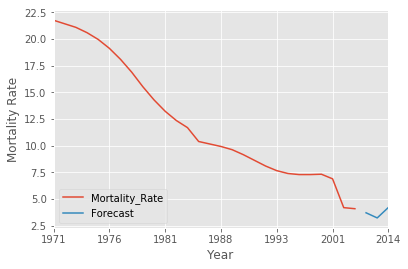

In [701]:
joined_table['Mortality_Rate'].plot()
joined_table['Forecast'].plot()
plt.legend(loc=3)
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()

In [636]:
datetime.date.today().year

2019

In [639]:
testing = datetime.datetime.fromtimestamp(next_unix)
testing.year

2016